<div style="background-color:rgba(40, 224, 224, 1); padding: 10px; height: 70px; border-radius: 15px;">
    <div style="font-family: 'Georgia', serif; font-size: 20px; padding: 10px; text-align: right; position: absolute; right: 20px;">
        Sakshi <br>
        <span style="font-family: 'Arial', sans-serif;font-size: 12px; color: #0a0a0a;">Data Analytics Trainee | AI/ML bootcamp</span> 
    </div>
</div>

<div style="background-color: #002147; padding: 10px; text-align: center; color: white; font-size: 32px; font-family: 'Arial', sans-serif;">
    Flipkart Scraping & Visualization <br><br>
    
</div>

<div style="background-color:LIGHTYELLOW ; color: black ; padding: 4px;">
    <h3>AGENDA
</h3> 

[Importing libraries ](#Importing-libraries)

[Send a request to flipkart](#Send-a-request-to-flipkart)

[Load using the requests package](#Load-using-the-requests-package)

[Prettify the code](#Prettify-the-code)

[Finding all division class that contain the details](#Finding-all-division-class-that-contain-the-details)

[Create empty list](#Create-empty-list)

[convert it into DataFrame](#convert-it-into-DataFrame)

[Data cleaning](#Data-cleaning)

[Visualization](#Visualization)

# Importing libraries 

In [1]:
import pandas as pd
import requests                  # For making HTTP requests
from bs4 import BeautifulSoup     # For parsing HTML content

## Send a request to flipkart

In [2]:
url="https://www.flipkart.com/search?q=laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_2_na_na_na&as-pos=1&as-type=RECENT&suggestionId=laptop%7CLaptops&requestId=96d9661c-1f08-4461-8813-cee40d62cede&as-searchtext=laptop"

In [3]:
response=requests.get(url)
response

<Response [200]>

In [4]:
if response.status_code==200:
    print("Successfully fetched the page")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


Successfully fetched the page


## Load using the requests package

In [5]:
soup=BeautifulSoup(response.content,"html.parser")

In [30]:
#soup

## Prettify the code

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.066267.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" re

## Finding all division class that contain the details

In [8]:
laptop=soup.find_all("div",class_="tUxRFH")

In [28]:
#laptop

### length 

In [10]:
len(laptop)

24

In [29]:
#laptop

## Create empty list

In [12]:
product=[]

In [13]:
product = []

for i in laptop:
    # Extract title
    laptop_name = i.find("div", class_="KzDlHZ")
    title = laptop_name.get_text(strip=True) if laptop_name else None

    # Extract price
    price = i.find("div", class_="Nx9bqj _4b5DiR")
    price = price.get_text(strip=True) if price else None

    # Extract rating
    rating = i.find("div", class_="XQDdHH")
    rating = rating.get_text(strip=True) if rating else None

    #  Validate all fields are non-None and not "NA"
    if title and price and rating and title != "NA" and price != "NA" and rating != "NA":
        product.append({
            "Title": title,
            "Price": price,
            "Rating": rating
        })


In [14]:
print(product)

[{'Title': 'Samsung Galaxy Book4 Metal Intel Core i5 13th Gen 1335U - (16 GB/512 GB SSD/Windows 11 Home) NP750XGJ-...', 'Price': '₹50,990', 'Rating': '4.5'}, {'Title': 'Acer Aspire 3 Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) A324-51 Thin and Light ...', 'Price': '₹25,990', 'Rating': '4.2'}, {'Title': 'Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 7730U - (16 GB/512 GB SSD/Windows 11 Home) Aspire AS15 - 4...', 'Price': '₹38,990', 'Rating': '4'}, {'Title': 'Acer Aspire 3 Intel Celeron Dual Core - (8 GB/128 GB SSD/Windows 11 Home) A311-45 Thin and Light Lapto...', 'Price': '₹14,870', 'Rating': '3.9'}, {'Title': 'Acer Aspire 3 Intel Celeron Dual Core - (8 GB/512 GB SSD/Windows 11 Home) A311-45 Thin and Light Lapto...', 'Price': '₹17,990', 'Rating': '3.9'}, {'Title': 'Samsung Galaxy Book4 Metal Intel Core i3 13th Gen 1315U - (8 GB/512 GB SSD/Windows 11 Home) NP750XGJ-L...', 'Price': '₹34,990', 'Rating': '4.5'}, {'Title': 'ASUS Expertbook P1 Intel Core i3 13th Gen 1315U 

### convert it into DataFrame

In [15]:
df=pd.DataFrame(product)

In [16]:
df

,Title,Price,Rating
0,Samsung Galaxy Book4 Metal Intel Core i5 13th ...,"₹50,990",4.5
1,Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...,"₹25,990",4.2
2,Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 77...,"₹38,990",4
3,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹14,870",3.9
4,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹17,990",3.9
5,Samsung Galaxy Book4 Metal Intel Core i3 13th ...,"₹34,990",4.5
6,ASUS Expertbook P1 Intel Core i3 13th Gen 1315...,"₹36,490",4.1
7,Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...,"₹15,990",3.7
8,ASUS Expertbook P1 Intel Core i7 13th Gen 1362...,"₹66,990",4.2
9,Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...,"₹9,499",3.9


# Data cleaning

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   23 non-null     object
 1   Price   23 non-null     object
 2   Rating  23 non-null     object
dtypes: object(3)
memory usage: 684.0+ bytes


In [18]:
df.describe()

,Title,Price,Rating
count,23,23,23
unique,23,23,10
top,Samsung Galaxy Book4 Metal Intel Core i5 13th ...,"₹50,990",4.2
freq,1,1,6


In [19]:
df.isnull().sum() 

Title     0
Price     0
Rating    0
dtype: int64

# Visualization

In [20]:
import matplotlib.pyplot as plt

In [21]:
print(df["Title"])

0     Samsung Galaxy Book4 Metal Intel Core i5 13th ...
1     Acer Aspire 3 Intel Core i3 12th Gen 1215U - (...
2     Acer Aspire 3 Backlit AMD Ryzen 7 Octa Core 77...
3     Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...
4     Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...
5     Samsung Galaxy Book4 Metal Intel Core i3 13th ...
6     ASUS Expertbook P1 Intel Core i3 13th Gen 1315...
7     Acer Aspire 3 Intel Celeron Dual Core - (8 GB/...
8     ASUS Expertbook P1 Intel Core i7 13th Gen 1362...
9     Lenovo 100e Chromebook Gen 4 MediaTek Kompanio...
10    HP Intel Core i5 13th Gen 1334U - (16 GB/1 TB ...
11    ASUS TUF Gaming A15 AMD Ryzen 7 Octa Core 7435...
12    HP MSO 2024 Intel Core i3 13th Gen 1315U - (16...
13    ASUS Vivobook Go 14 (2025) with Office 2024 + ...
14    ASUS Vivobook 15, with Backlit Keyboard, Intel...
15    HP Intel Core i7 13th Gen 13620H - (16 GB/512 ...
16    DELL 15 Intel Core i3 13th Gen 1305U - (16 GB/...
17    Acer Aspire 3 Intel Celeron Dual Core N450

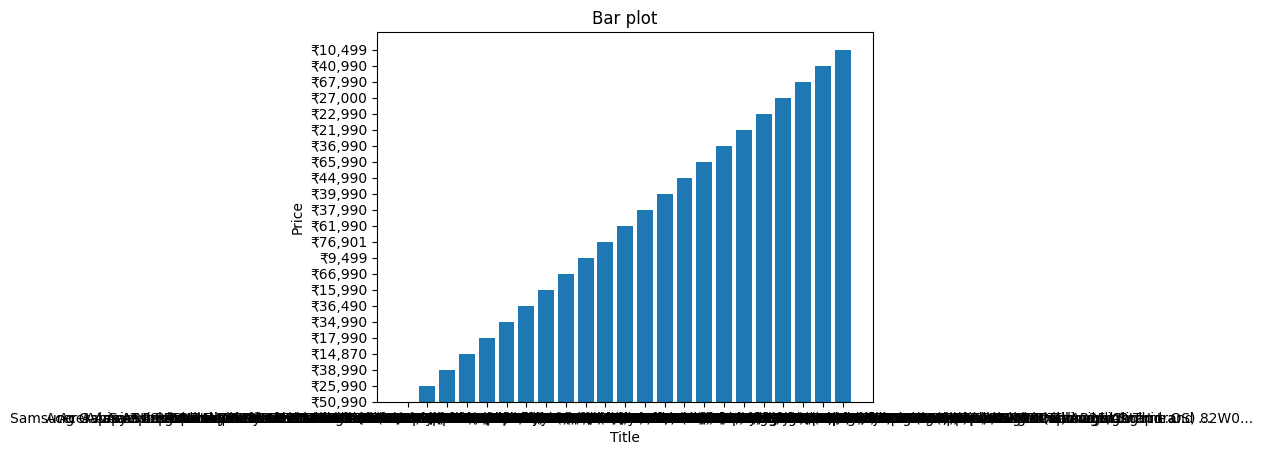

In [22]:
plt.bar(df["Title"], df["Price"])
plt.title("Bar plot")
plt.xlabel("Title")
plt.ylabel("Price")
plt.show()

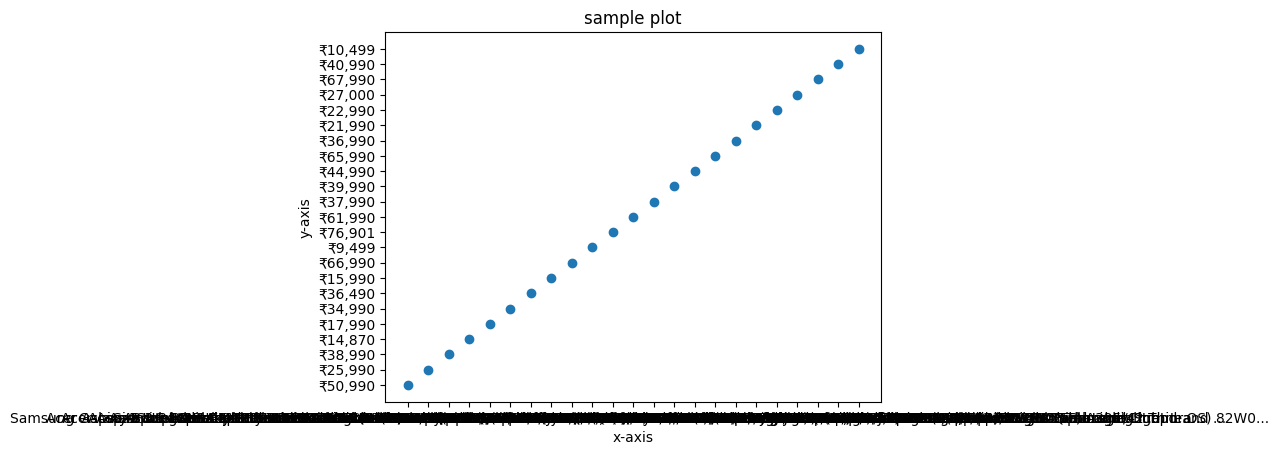

In [23]:
plt.scatter(df["Title"],df["Price"])
plt.title("sample plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()


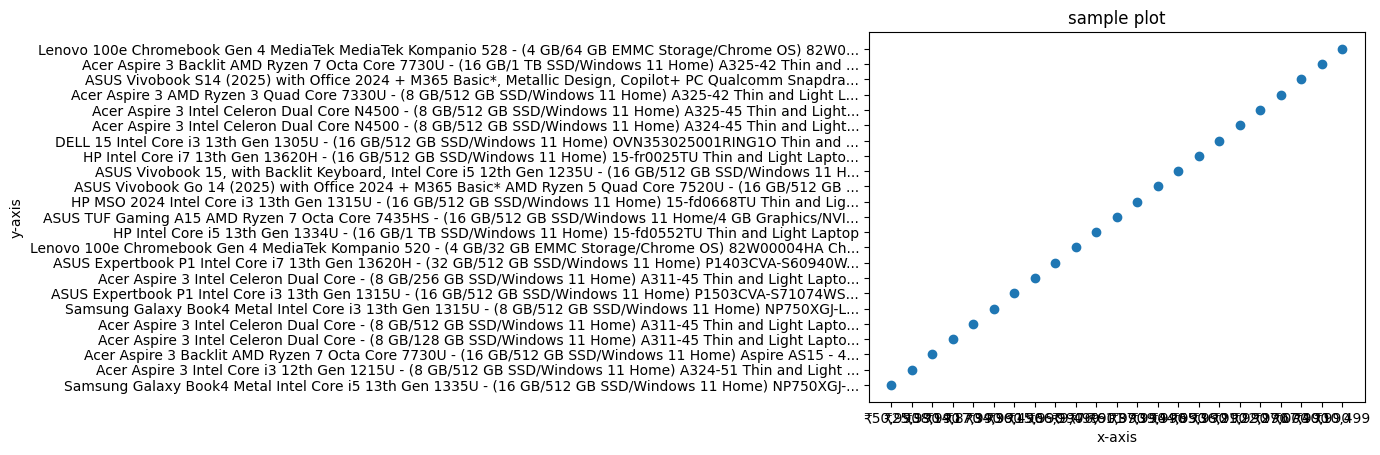

In [24]:
plt.scatter(df["Price"],df["Title"])
plt.title("sample plot")
plt.ylabel("y-axis")
plt.xlabel("x-axis")
plt.show()


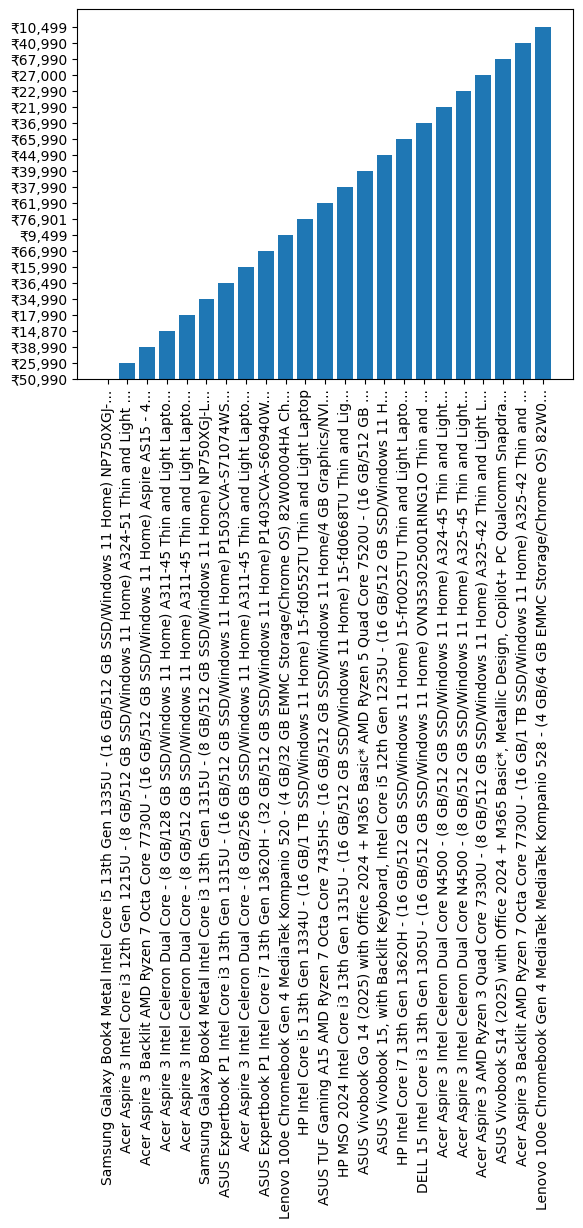

In [25]:
plt.bar(df["Title"], df["Price"])


plt.xticks(rotation=90)

plt.show()

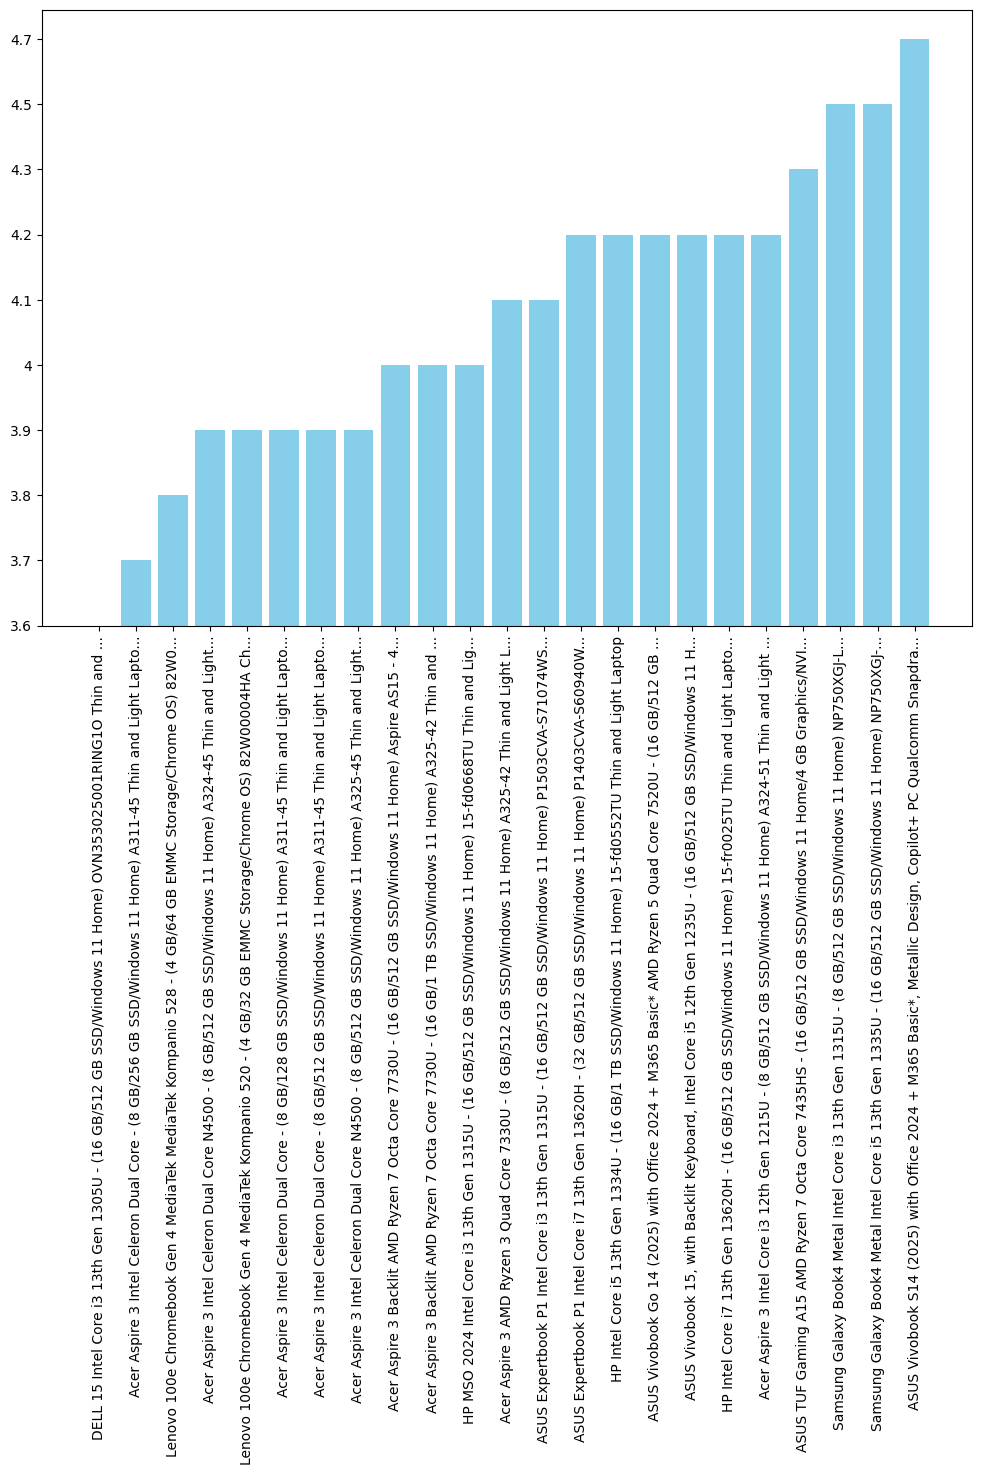

In [26]:
df1 = df.sort_values(by='Rating', ascending=True) 
plt.figure(figsize=(12,8))
plt.bar(df1['Title'], df1['Rating'], color='skyblue')
plt.xticks(rotation=90)
plt.show()

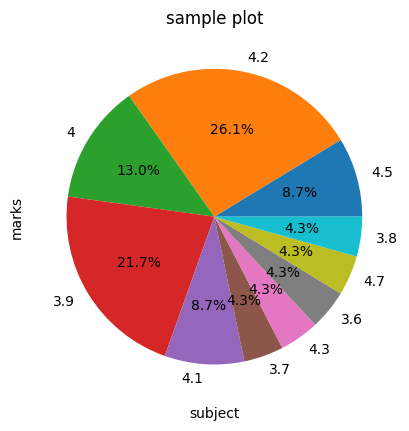

In [27]:
#pie chart

from collections import Counter
counts=Counter(df["Rating"])
label=list(counts.keys())
size=list(counts.values())

plt.pie(size,labels=label,autopct='%1.1f%%')
plt.title("sample plot")
plt.xlabel("subject")
plt.ylabel("marks")
plt.show()

<div style="background: linear-gradient(to right, #1FAEDE, #7b3a60ff); color: white; padding: 20px; text-align: center; border-radius: 12px; font-family: 'Segoe UI', sans-serif; box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
    <h1 style="margin: 0; font-size: 32px; letter-spacing: 4px;">
         END 
    </h1>
</div>